In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_hastie_10_2

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF




#IMPORTANT README ON THIS CLASSIFICATION EXERCISE
=================================================================


## Time expectations
- Data cleaning 2 hours 
- Data preprocessing (features, scaling) 1 hours
- Models investigation 3 hours - this task can be splited
- Models implementation - 2 hours
- Slides/dashboard/notebook - 2 hours
- Finalization and "beautification" (github, etc)  - 2 hours
Average time per person 4-6 hours

1. Please make sure the Y is not too granular: make sure to bin it to simplify the work of models

2. After using the model, play around with hyperparams

3. Finally, compare model performance by accuracy, ROC-AUC... 60+ % would be a good start

4. Use Trello instead of JIRA for project mgmt: make sure to provide hours worked on each task

In [2]:
df = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_3/Project_week_7/imdb_processed.csv')
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [3]:
df.loc[df.title.str.contains("Terminator")]

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
3847,3847,Terminator 2: Judgment Day,1991.0,movie,"['Action', 'Sci-Fi']",8.5,1033000.0,['United States'],"['English', 'Spanish']","['Arnold Schwarzenegger', 'Linda Hamilton', 'E...",['James Cameron'],['Brad Fiedel'],"['James Cameron', 'William Wisher']",51.0


In [4]:
df.tail()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
8446,8446,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese'],"['Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio ...","['Ishirô Honda', 'Jun Fukuda', 'Kengo Furusawa']",['Kunio Miyauchi'],"[""Shin'ichi Sekizawa""]",NaN
8447,8447,Fidel Castro,2005.0,episode,"['Documentary', 'Biography', 'History']",6.4,44.0,NaN,"['English', 'Spanish']","['Rena Baskin', 'Fulgencio Batista', 'James Bl...","['Adriana Bosch', 'M Pink Christofalo']",['Mason Daring'],['Adriana Bosch'],NaN
8448,8448,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376.0,['United States'],['English'],"['David Keith', 'Stephanie Niznik', ""Ryan O'Ne...",['Matt Codd'],['Richard McHugh'],"['Jonathan Raymond', 'Jonathan Raymond', 'Phil...",NaN
8449,8449,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English'],"['Neve Campbell', 'Malcolm McDowell', 'James F...",['Robert Altman'],['Van Dyke Parks'],"['Neve Campbell', 'Barbara Turner', 'Barbara T...",NaN
8450,8450,Predator,1987.0,movie,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",7.8,386850.0,"['United States', 'Mexico']","['English', 'Spanish', 'Russian']","['Arnold Schwarzenegger', 'Carl Weathers', 'El...",['John McTiernan'],['Alan Silvestri'],"['Jim Thomas', 'John Thomas']",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8451 non-null   int64  
 1   title       8451 non-null   object 
 2   year        8451 non-null   float64
 3   kind        8451 non-null   object 
 4   genre       8384 non-null   object 
 5   rating      8135 non-null   float64
 6   vote        8135 non-null   float64
 7   country     8152 non-null   object 
 8   language    8052 non-null   object 
 9   cast        8280 non-null   object 
 10  director    7140 non-null   object 
 11  composer    5722 non-null   object 
 12  writer      7204 non-null   object 
 13  runtime     6798 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 924.5+ KB


In [6]:
df.isna().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.isna().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [9]:
df.drop('composer', axis=1, inplace=True)

In [10]:
genre_drop = df.loc[df.genre.isna()].index

In [11]:
df.drop(genre_drop, axis=0, inplace=True)

In [12]:
df.genre.isna().sum()

0

In [13]:
cast_drop = df.loc[df.cast.isna()].index
df.drop(cast_drop, axis=0, inplace=True)
df.genre.isna().sum()

0

In [14]:
df.isna().sum()

title          0
year           0
kind           0
genre          0
rating       224
vote         224
country      233
language     324
cast           0
director    1185
writer      1102
runtime     1618
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8232 entries, 0 to 8450
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     8232 non-null   object 
 1   year      8232 non-null   float64
 2   kind      8232 non-null   object 
 3   genre     8232 non-null   object 
 4   rating    8008 non-null   float64
 5   vote      8008 non-null   float64
 6   country   7999 non-null   object 
 7   language  7908 non-null   object 
 8   cast      8232 non-null   object 
 9   director  7047 non-null   object 
 10  writer    7130 non-null   object 
 11  runtime   6614 non-null   float64
dtypes: float64(4), object(8)
memory usage: 836.1+ KB


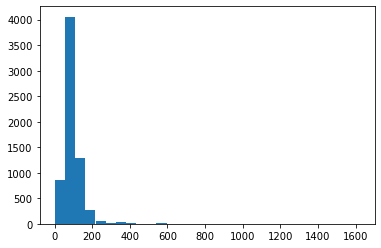

In [16]:
ax = plt.hist(x=df.runtime, bins=30)
plt.show()

In [17]:
df.runtime.max()

1620.0

In [18]:
df.runtime.sum()

661736.0

In [19]:
df.runtime.sort_values().nlargest(n=500).sum()

118400.0

In [20]:
df.groupby('title')['runtime'].sum().nlargest(n=10)

title
The Twilight Zone                                  3965.0
French Twist                                       1620.0
The Complete History of the Philadelphia Eagles    1620.0
Stranger Inside                                    1380.0
Thanksgiving Family Reunion                        1335.0
Sabretooth                                         1140.0
Alphaville                                          960.0
Hercules: The Legendary Journeys                    930.0
Tom and Jerry: The Magic Ring                       883.0
Star Trek: The Next Generation                      851.0
Name: runtime, dtype: float64

In [21]:
df.groupby('title')['runtime'].sum().nsmallest(n=1500)

title
'Angel': Season 4 Overview              0.0
'Manos' the Hands of Fate               0.0
'Weird Al' Yankovic Live!               0.0
10 Attitudes                            0.0
1941                                    0.0
                                       ... 
Withnail & I                            0.0
Without Warning                         0.0
Wolfen                                  0.0
Woman Chasing the Butterfly of Death    0.0
Women in Revolt                         0.0
Name: runtime, Length: 1500, dtype: float64

In [22]:
df.groupby('year')['title'].count().nlargest(n=20)

year
2003.0    661
2004.0    639
2002.0    620
2001.0    605
2000.0    516
1999.0    463
1998.0    377
1997.0    312
1996.0    295
2005.0    294
1995.0    228
1994.0    213
1993.0    199
1992.0    150
1991.0    141
1988.0    140
1987.0    126
1990.0    121
1989.0    114
1986.0     97
Name: title, dtype: int64

In [23]:
df.groupby('country')['title'].count().nlargest(n=20)

country
['United States']                      3709
['United Kingdom']                      724
['Japan']                               571
['India']                               244
['Hong Kong']                           214
['Canada']                              207
['France']                              154
['United Kingdom', 'United States']     149
['Canada', 'United States']              87
['Australia']                            79
['United States', 'Canada']              70
['United States', 'United Kingdom']      67
['Italy']                                66
['Germany']                              43
['Spain']                                41
['France', 'Italy']                      37
['South Korea']                          35
['Italy', 'France']                      33
['Germany', 'United States']             30
['Soviet Union']                         30
Name: title, dtype: int64

In [24]:
df.groupby('year')['genre'].count().nlargest(n=20)

year
2003.0    661
2004.0    639
2002.0    620
2001.0    605
2000.0    516
1999.0    463
1998.0    377
1997.0    312
1996.0    295
2005.0    294
1995.0    228
1994.0    213
1993.0    199
1992.0    150
1991.0    141
1988.0    140
1987.0    126
1990.0    121
1989.0    114
1986.0     97
Name: genre, dtype: int64

In [25]:
df.groupby('country')['genre'].count().nlargest(n=20)

country
['United States']                      3709
['United Kingdom']                      724
['Japan']                               571
['India']                               244
['Hong Kong']                           214
['Canada']                              207
['France']                              154
['United Kingdom', 'United States']     149
['Canada', 'United States']              87
['Australia']                            79
['United States', 'Canada']              70
['United States', 'United Kingdom']      67
['Italy']                                66
['Germany']                              43
['Spain']                                41
['France', 'Italy']                      37
['South Korea']                          35
['Italy', 'France']                      33
['Germany', 'United States']             30
['Soviet Union']                         30
Name: genre, dtype: int64

In [26]:
df.isna().sum()

title          0
year           0
kind           0
genre          0
rating       224
vote         224
country      233
language     324
cast           0
director    1185
writer      1102
runtime     1618
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8232 entries, 0 to 8450
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     8232 non-null   object 
 1   year      8232 non-null   float64
 2   kind      8232 non-null   object 
 3   genre     8232 non-null   object 
 4   rating    8008 non-null   float64
 5   vote      8008 non-null   float64
 6   country   7999 non-null   object 
 7   language  7908 non-null   object 
 8   cast      8232 non-null   object 
 9   director  7047 non-null   object 
 10  writer    7130 non-null   object 
 11  runtime   6614 non-null   float64
dtypes: float64(4), object(8)
memory usage: 836.1+ KB


In [28]:
runtime_drop = df.loc[df.runtime.isna()].index
df.drop(runtime_drop, axis=0, inplace=True)
df.info

<bound method DataFrame.info of                                                   title    year  \
0                                       Dinosaur Planet  2003.0   
1                                     Get Up and Dance!  1994.0   
3                          What the #$*! Do We (K)now!?  2004.0   
4     Class of Nuke 'Em High Part II: Subhumanoid Me...  1991.0   
6                      Neil Diamond: Greatest Hits Live  1988.0   
...                                                 ...     ...   
7261                                              Shade  2003.0   
7262                                Nothing But Trouble  1991.0   
7263                                 The Whistle Blower  1986.0   
7265                                     The Hitchhiker  1983.0   
7266                                          SpaceCamp  1986.0   

                kind                                              genre  \
0     tv mini series             ['Documentary', 'Animation', 'Family']   
1        vide

In [29]:
df.isna().sum()

title          0
year           0
kind           0
genre          0
rating       191
vote         191
country      198
language     281
cast           0
director    1019
writer       933
runtime        0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6614 non-null   object 
 1   year      6614 non-null   float64
 2   kind      6614 non-null   object 
 3   genre     6614 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6416 non-null   object 
 7   language  6333 non-null   object 
 8   cast      6614 non-null   object 
 9   director  5595 non-null   object 
 10  writer    5681 non-null   object 
 11  runtime   6614 non-null   float64
dtypes: float64(4), object(8)
memory usage: 671.7+ KB


In [31]:
df.isna().sum()

title          0
year           0
kind           0
genre          0
rating       191
vote         191
country      198
language     281
cast           0
director    1019
writer       933
runtime        0
dtype: int64

In [32]:
df.director = df.director.replace(np.nan, 'Unknown')

In [33]:
df.director.unique()

array(['Unknown', "['Steve Purcell']",
       "['William Arntz', 'Betsy Chasse', 'Mark Vicente']", ...,
       "['Damian Nieman']", "['Dan Aykroyd']", "['Simon Langton']"],
      dtype=object)

In [34]:
df.writer = df.writer.replace(np.nan, 'Unknown')

In [35]:
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating      191
vote        191
country     198
language    281
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [36]:
rating_drop = df.loc[df.rating.isna()].index
df.drop(rating_drop, axis=0, inplace=True)
df.info

<bound method DataFrame.info of                                                   title    year  \
0                                       Dinosaur Planet  2003.0   
1                                     Get Up and Dance!  1994.0   
3                          What the #$*! Do We (K)now!?  2004.0   
4     Class of Nuke 'Em High Part II: Subhumanoid Me...  1991.0   
6                      Neil Diamond: Greatest Hits Live  1988.0   
...                                                 ...     ...   
7261                                              Shade  2003.0   
7262                                Nothing But Trouble  1991.0   
7263                                 The Whistle Blower  1986.0   
7265                                     The Hitchhiker  1983.0   
7266                                          SpaceCamp  1986.0   

                kind                                              genre  \
0     tv mini series             ['Documentary', 'Animation', 'Family']   
1        vide

In [37]:
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    223
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [38]:
df[df.vote.isna()]['runtime'].sort_values(ascending=False).sum()

0.0

In [39]:
missing_language = df.loc[(df.language.isna()==True) & (df.country == "['United States']")].index
missing_language

Int64Index([ 191,  208,  233,  414,  520,  554,  667,  730,  813,  819,  896,
             920,  928,  935,  947, 1044, 1110, 1226, 1401, 1529, 1649, 2141,
            2157, 2219, 2255, 2508, 2719, 2725, 2865, 2942, 3178, 3277, 3348,
            3393, 3508, 3513, 3535, 3826, 3888, 3948, 4148, 4195, 4245, 4291,
            4442, 4458, 4482, 4575, 4626, 4628, 4743, 4790, 4848, 4964, 5131,
            5146, 5167, 5257, 5278, 5283, 5524, 5863, 6908, 6945, 7054],
           dtype='int64')

In [40]:
df.language = np.where( (df.language.isna()) & (df.country == "['United States']"), 'English', df.language)
df.isna().sum()


title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    158
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [41]:
df.language = np.where( (df.language.isna()) & (df.country == "['Japan']"), 'Japanese', df.language)
df.isna().sum()


title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    147
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [42]:
df.language = np.where( (df.language.isna()) & (df.country == "['United Kingdom']"), 'English', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    143
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [43]:
df.country = np.where( (df.country.isna()) & (df.language == "['Japanese']"), 'Japan', df.country)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    143
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [44]:
df[(df.country.isna() == True) & (df.language.isna() == False)]['language'].value_counts()

['English']               13
['English', 'Spanish']     1
Name: language, dtype: int64

In [45]:
df[(df.language.isna() == True) & (df.country.isna() == False)]['country'].value_counts()

['Canada']                                       5
['Canada', 'United States']                      3
['Sweden']                                       2
['Canada', 'United Kingdom']                     2
['Norway']                                       1
['Canada', 'France', 'United Kingdom']           1
['France']                                       1
['Hong Kong']                                    1
['Italy']                                        1
['United States', 'Canada']                      1
['United States', 'Japan', 'Canada']             1
['United States', 'United Kingdom']              1
['Mexico']                                       1
['Canada', 'France', 'Guadeloupe']               1
['France', 'Madagascar', 'Vietnam', 'Canada']    1
['Ireland', 'United States']                     1
Name: country, dtype: int64

In [46]:
df.language = np.where( (df.language.isna()) & (df.country == "['Sweden']"), 'Swedish', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    141
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [47]:
df.language = np.where( (df.language.isna()) & (df.country == "['Norway']"), 'Norwegian', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    140
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [48]:
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    140
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6423 non-null   object 
 1   year      6423 non-null   float64
 2   kind      6423 non-null   object 
 3   genre     6423 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6290 non-null   object 
 7   language  6283 non-null   object 
 8   cast      6423 non-null   object 
 9   director  6423 non-null   object 
 10  writer    6423 non-null   object 
 11  runtime   6423 non-null   float64
dtypes: float64(4), object(8)
memory usage: 652.3+ KB


In [50]:
df.language = np.where((df.language.isna()), 'Other', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language      0
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [51]:
df.country = np.where((df.country.isna()), 'Other', df.country)
df.isna().sum()

title       0
year        0
kind        0
genre       0
rating      0
vote        0
country     0
language    0
cast        0
director    0
writer      0
runtime     0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6423 non-null   object 
 1   year      6423 non-null   float64
 2   kind      6423 non-null   object 
 3   genre     6423 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6423 non-null   object 
 7   language  6423 non-null   object 
 8   cast      6423 non-null   object 
 9   director  6423 non-null   object 
 10  writer    6423 non-null   object 
 11  runtime   6423 non-null   float64
dtypes: float64(4), object(8)
memory usage: 652.3+ KB


In [53]:
df.drop('cast', axis=1, inplace=True)

In [54]:
df.head()

,title,year,kind,genre,rating,vote,country,language,director,writer,runtime
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],Unknown,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],['Steve Purcell'],Unknown,83.0
3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['William Arntz', 'Betsy Chasse', 'Mark Vicente']","['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],['Eric Louzil'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,81.0,['United States'],['English'],"['Dwight Hemion', 'Peter Israelson']","['Kenny Solms', 'Ann Elder', 'Toem Perew']",55.0


In [55]:
df.drop('writer', axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6423 non-null   object 
 1   year      6423 non-null   float64
 2   kind      6423 non-null   object 
 3   genre     6423 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6423 non-null   object 
 7   language  6423 non-null   object 
 8   director  6423 non-null   object 
 9   runtime   6423 non-null   float64
dtypes: float64(4), object(6)
memory usage: 552.0+ KB


In [57]:
df.language.value_counts()

['English']                                                                     3795
['Japanese']                                                                     342
['Hindi']                                                                        164
Other                                                                            140
['French']                                                                       136
                                                                                ... 
['English', 'Hungarian']                                                           1
['Italian', 'English', 'Latin', 'Greek, Ancient (to 1453)']                        1
['English', 'German', 'French', 'Polish']                                          1
['Portuguese', 'Spanish']                                                          1
['Cantonese', 'English', 'Japanese', 'Hindi', 'Mandarin', 'Punjabi', 'Urdu']       1
Name: language, Length: 583, dtype: int64

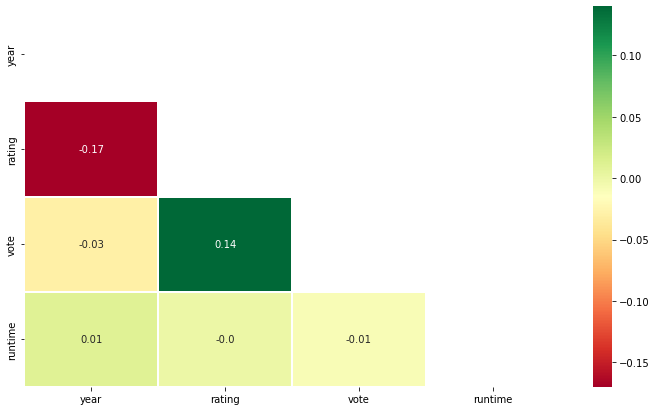

In [58]:
fig, ax = plt.subplots(figsize= (12,7))

corr = df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt="", cmap='RdYlGn', mask=mask, linewidths=0.30, ax=ax)
plt.show()

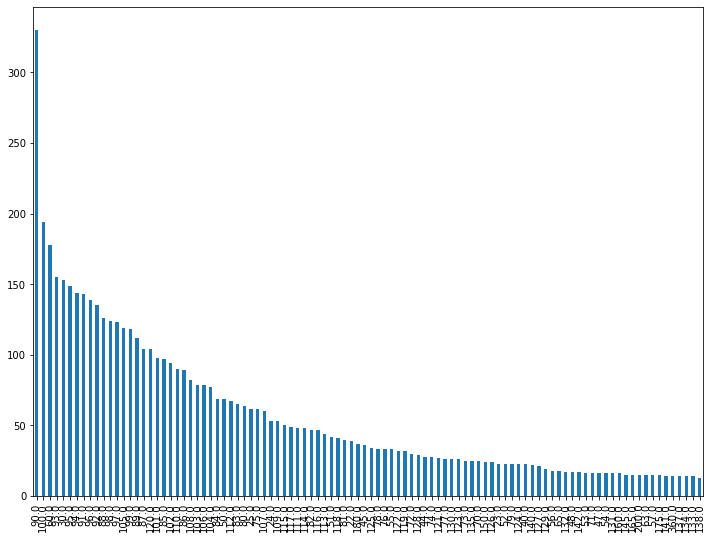

In [59]:
runtime = df.runtime.value_counts().nlargest(n=100)
fig, ax = plt.subplots(figsize=(12, 9))
runtime.plot.bar()
plt.show()

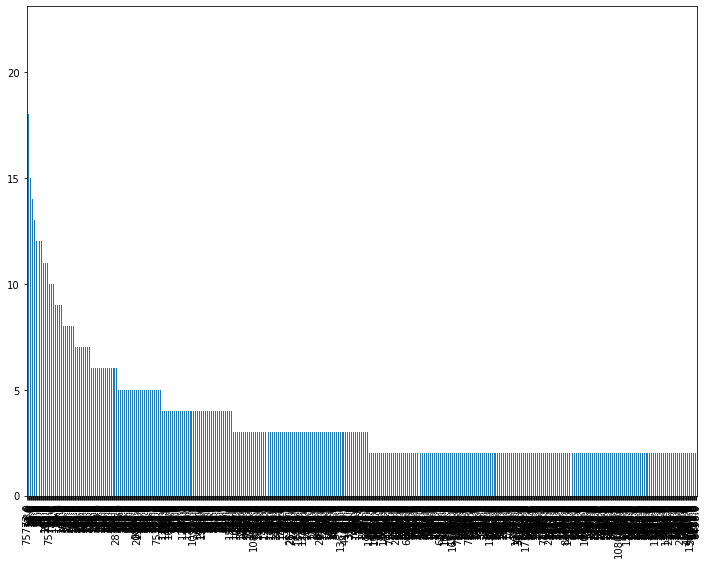

In [60]:
vote = df.vote.value_counts().nlargest(n=1000)
fig, ax = plt.subplots(figsize=(12, 9))
vote.plot.bar()
plt.show()

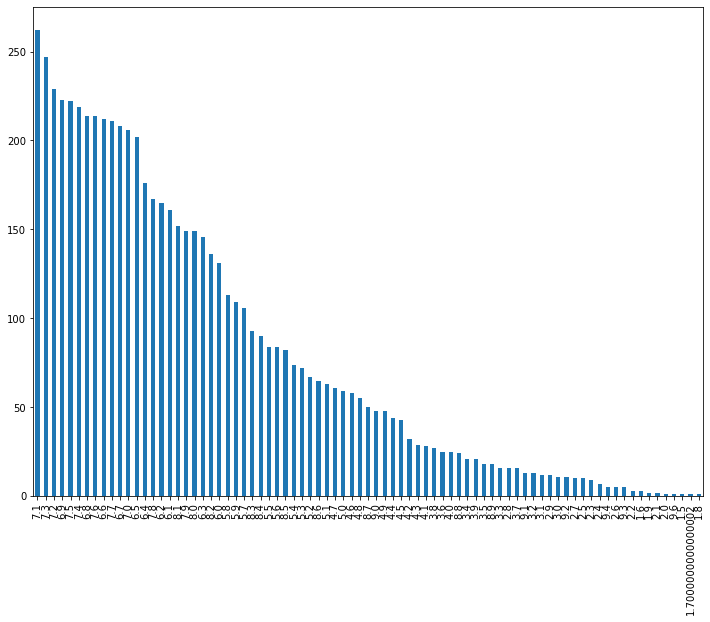

In [61]:
rating = df.rating.value_counts().nlargest(n=1000)
fig, ax = plt.subplots(figsize=(12, 9))
rating.plot.bar()
plt.show()

In [62]:
#Split genres, country, language and keep first of each

df.country = df.country.str.replace("[", "").str.replace("]", "")
df.country
netflix_country= df.country.str.split(",").apply(pd.Series)
df.country=netflix_country[0]
df.country


df.genre=df.genre.str.replace("[", "").str.replace("]", "")
df.genre
netflix_genre= df.genre.str.split(",").apply(pd.Series)
df.genre=netflix_genre[0]
df.genre 

df.language=df.language.str.replace("[", "").str.replace("]", "")
df.language
netflix_language= df.language.str.split(",").apply(pd.Series)
df.language=netflix_language[0]
df.language

df.director=df.director.str.replace("[", "").str.replace("]", "")
df.director
netflix_director= df.director.str.split(",").apply(pd.Series)
df.director = netflix_director[0]
df.director



/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/4069824184.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.country = df.country.str.replace("[", "").str.replace("]", "")
/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/4069824184.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.genre=df.genre.str.replace("[", "").str.replace("]", "")
/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/4069824184.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.language=df

0               Unknown
1       'Steve Purcell'
3       'William Arntz'
4         'Eric Louzil'
6       'Dwight Hemion'
             ...       
7261    'Damian Nieman'
7262      'Dan Aykroyd'
7263    'Simon Langton'
7265            Unknown
7266      'Harry Winer'
Name: director, Length: 6423, dtype: object

In [63]:
df.head()

,title,year,kind,genre,rating,vote,country,language,director,runtime
0,Dinosaur Planet,2003.0,tv mini series,'Documentary',7.7,474.0,'United States','English',Unknown,50.0
1,Get Up and Dance!,1994.0,video movie,'Family',8.1,18.0,'United States','English','Steve Purcell',83.0
3,What the #$*! Do We (K)now!?,2004.0,movie,'Documentary',5.3,13432.0,'United States','English','William Arntz',60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,'Comedy',4.5,2177.0,'United States','English','Eric Louzil',96.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,'Documentary',8.0,81.0,'United States','English','Dwight Hemion',55.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6423 non-null   object 
 1   year      6423 non-null   float64
 2   kind      6423 non-null   object 
 3   genre     6423 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6423 non-null   object 
 7   language  6423 non-null   object 
 8   director  6423 non-null   object 
 9   runtime   6423 non-null   float64
dtypes: float64(4), object(6)
memory usage: 552.0+ KB


In [65]:
df.kind.value_counts()

#ok for dummies

movie             3793
video movie        960
tv movie           616
tv series          509
episode            325
tv mini series     204
video game           8
tv short             8
Name: kind, dtype: int64

In [66]:
df.genre.value_counts()

'Drama'          1190
'Comedy'         1089
'Documentary'    1008
'Action'          878
'Animation'       661
'Crime'           369
'Adventure'       259
'Horror'          249
'Biography'       190
'Music'           171
'Family'           61
'Short'            60
'Fantasy'          40
'Thriller'         37
'Mystery'          26
'Sci-Fi'           25
'Musical'          23
'Romance'          21
'Western'          19
'Sport'            19
'Reality-TV'       12
'History'           7
'Game-Show'         5
'Film-Noir'         3
'Talk-Show'         1
Name: genre, dtype: int64

In [67]:
other_genres = df.genre.value_counts()[10:].index.tolist()

In [68]:
df.genre[df.genre.isin(other_genres)]="Other"
df.genre.unique()

/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/2262671922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.genre[df.genre.isin(other_genres)]="Other"


array(["'Documentary'", 'Other', "'Comedy'", "'Action'", "'Adventure'",
       "'Drama'", "'Animation'", "'Horror'", "'Biography'", "'Music'",
       "'Crime'"], dtype=object)

In [69]:
df.genre.value_counts()

#genre is now ok for dummies

'Drama'          1190
'Comedy'         1089
'Documentary'    1008
'Action'          878
'Animation'       661
'Crime'           369
Other             359
'Adventure'       259
'Horror'          249
'Biography'       190
'Music'           171
Name: genre, dtype: int64

In [70]:
df.country.value_counts()

'United States'     3073
'United Kingdom'     835
'Japan'              513
'Canada'             312
'France'             280
                    ... 
'Portugal'             1
'Aruba'                1
'East Germany'         1
'Cambodia'             1
'Venezuela'            1
Name: country, Length: 63, dtype: int64

In [71]:
other_countries = df.country.value_counts()[10:].index.tolist()

In [72]:
df.country[df.country.isin(other_countries)]="Other"
df.country.unique()

/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/4140505687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[df.country.isin(other_countries)]="Other"


array(["'United States'", "'United Kingdom'", "'India'", "'Japan'",
       "'France'", "'Canada'", 'Other', "'Hong Kong'", "'Italy'",
       "'Australia'"], dtype=object)

In [73]:
df.country.value_counts()

'United States'     3073
'United Kingdom'     835
Other                768
'Japan'              513
'Canada'             312
'France'             280
'Hong Kong'          224
'India'              209
'Italy'              121
'Australia'           88
Name: country, dtype: int64

In [74]:
df_num = df.select_dtypes(include=np.number)
df_num

,year,rating,vote,runtime
0,2003.0,7.7,474.0,50.0
1,1994.0,8.1,18.0,83.0
3,2004.0,5.3,13432.0,60.0
4,1991.0,4.5,2177.0,96.0
6,1988.0,8.0,81.0,55.0
...,...,...,...,...
7261,2003.0,6.3,12485.0,106.0
7262,1991.0,5.1,23598.0,92.0
7263,1986.0,6.2,2069.0,123.0
7265,1983.0,6.8,1482.0,112.0


In [75]:
df_cat= df.drop(df_num, axis=1)
df_cat

,title,kind,genre,country,language,director
0,Dinosaur Planet,tv mini series,'Documentary','United States','English',Unknown
1,Get Up and Dance!,video movie,Other,'United States','English','Steve Purcell'
3,What the #$*! Do We (K)now!?,movie,'Documentary','United States','English','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,movie,'Comedy','United States','English','Eric Louzil'
6,Neil Diamond: Greatest Hits Live,video movie,'Documentary','United States','English','Dwight Hemion'
...,...,...,...,...,...,...
7261,Shade,movie,'Crime','United States','English','Damian Nieman'
7262,Nothing But Trouble,movie,'Comedy','United States','English','Dan Aykroyd'
7263,The Whistle Blower,movie,Other,'United Kingdom','English','Simon Langton'
7265,The Hitchhiker,tv series,'Drama','Canada','English',Unknown


In [76]:
other_languages = df.language.value_counts()[10:].index.tolist()

df.language[df.language.isin(other_languages)]="Other"
df.language.unique()

/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/3684344997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.language[df.language.isin(other_languages)]="Other"


array(["'English'", "'Hindi'", "'Japanese'", "'French'", 'Other',
       "'Cantonese'", "'Mandarin'", "'Spanish'", "'German'", "'Italian'"],
      dtype=object)

In [77]:
df.language.value_counts()

'English'      4493
Other           520
'Japanese'      438
'French'        248
'Hindi'         193
'Cantonese'     183
'Italian'       102
'Spanish'        99
'German'         76
'Mandarin'       71
Name: language, dtype: int64

In [78]:
other_directors = df.director.value_counts()[10:].index.tolist()

df.director[df.director.isin(other_directors)]="Other"
df.director.value_counts()

/var/folders/9y/45l79l3x40s95c93b61_6txw0000gn/T/ipykernel_39339/2820433243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.director[df.director.isin(other_directors)]="Other"


Other                     5369
Unknown                    926
'Kevin Dunn'                21
'Beth McCarthy-Miller'      14
'Akira Kurosawa'            14
'Takashi Miike'             14
'Werner Herzog'             14
'Jing Wong'                 13
'David Mallet'              13
'Tom Clegg'                 13
'Jim Wynorski'              12
Name: director, dtype: int64

In [79]:
# drop 'title' column

df.drop('title', axis=1, inplace=True)

In [80]:
df.columns

Index(['year', 'kind', 'genre', 'rating', 'vote', 'country', 'language',
       'director', 'runtime'],
      dtype='object')

In [81]:
# Get dummies with 'kind', 'genre', 'country', 'language','director' columns
df = pd.get_dummies(df, columns=['kind', 'genre', 'country', 'language','director'])

In [82]:
df.head()

,year,rating,vote,runtime,kind_episode,kind_movie,kind_tv mini series,kind_tv movie,kind_tv series,kind_tv short,...,director_'Beth McCarthy-Miller',director_'David Mallet',director_'Jim Wynorski',director_'Jing Wong',director_'Kevin Dunn',director_'Takashi Miike',director_'Tom Clegg',director_'Werner Herzog',director_Other,director_Unknown
0,2003.0,7.7,474.0,50.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1994.0,8.1,18.0,83.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2004.0,5.3,13432.0,60.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1991.0,4.5,2177.0,96.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1988.0,8.0,81.0,55.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
# bin the rating with 3 labels 'high' to 'low'

bin_rating = ['High', 'Medium', 'Low']
df.rating = pd.qcut(df.rating,
                            q=3,
                            labels=bin_rating,
                            precision=0)
df.head()

,year,rating,vote,runtime,kind_episode,kind_movie,kind_tv mini series,kind_tv movie,kind_tv series,kind_tv short,...,director_'Beth McCarthy-Miller',director_'David Mallet',director_'Jim Wynorski',director_'Jing Wong',director_'Kevin Dunn',director_'Takashi Miike',director_'Tom Clegg',director_'Werner Herzog',director_Other,director_Unknown
0,2003.0,Low,474.0,50.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1994.0,Low,18.0,83.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2004.0,High,13432.0,60.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1991.0,High,2177.0,96.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1988.0,Low,81.0,55.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
df.rating.value_counts()

High      2296
Low       2124
Medium    2003
Name: rating, dtype: int64

In [85]:
# Encoding year in 3 periods

df.loc[df.year < 1990, 'before_90s'] = 1
df.loc[(df.year >= 1990) & (df.year < 2000), '90s'] = 1
df.loc[df.year >= 2000, '2000s'] = 1
df['before_90s'].fillna(0, inplace = True)
df['90s'].fillna(0, inplace = True)
df['2000s'].fillna(0, inplace = True)

In [86]:
df.drop('year', axis=1, inplace=True)

In [87]:
# split the data into train and test

from sklearn.model_selection import train_test_split

# Your code here:
x = df.drop(['rating'], axis=1)
y = df['rating']

# Scale the data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# print(x.head())
print(x.shape)
# print(y.head())
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = pd.DataFrame(x_train)

# scaled x_train
x_train

(6423, 55)
(6423,)
(5138, 55)
(5138,)
(1285, 55)
(1285,)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.187367,0.759201,-0.23086,-1.200919,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,2.385503,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,-0.630974,-0.667566,1.207126
1,-0.195218,-0.153813,-0.23086,-1.200919,-0.181115,3.070334,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,-0.630974,-0.667566,1.207126
2,-0.192278,0.104874,-0.23086,-1.200919,-0.181115,3.070334,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,-0.630974,-0.667566,1.207126
3,-0.195008,-0.001644,-0.23086,0.832696,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,1.584852,-0.667566,-0.828414
4,-0.184556,0.378778,-0.23086,0.832696,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,1.584852,-0.667566,-0.828414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5133,-0.177381,-0.914658,-0.23086,0.832696,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,-0.630974,1.497978,-0.828414
5134,-0.079857,0.120091,-0.23086,0.832696,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,-0.630974,1.497978,-0.828414
5135,0.200000,-0.001644,-0.23086,0.832696,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,1.584852,-0.667566,-0.828414
5136,2.640545,-0.001644,-0.23086,0.832696,-0.181115,-0.325698,-0.293372,-0.035314,-0.035314,-0.419199,...,-0.045034,-0.057273,-0.046738,-0.045034,-0.046738,0.443071,-0.410433,-0.630974,1.497978,-0.828414


In [88]:
# Hypertuning with Random Search to check potential optimised result (not guaranteed)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,400,5)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,
       330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390,
       395])},
                   scoring='accuracy', verbose=1)

In [89]:
rand_search.best_params_

{'n_estimators': 390}

In [90]:
rand_search.best_score_

0.6103544758447976

In [91]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5758754863813229
[[319  53  76]
 [ 45 298  89]
 [152 130 123]]


In [92]:
# Logistic Regression Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='weighted'))
print('Recall Score:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Confusion Matrix:
 [[319  53  76]
 [ 45 298  89]
 [152 130 123]]
Precision Score: 0.558422102686762
Recall Score: 0.5758754863813229
F1 Score: 0.5620783897423725


In [93]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='weighted'))
print('Recall Score:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

The accuracy of the Random Forest Classifier is: 61.08949416342413 %
Confusion Matrix:
 [[307  36 105]
 [ 30 304  98]
 [114 117 174]]
Precision Score: 0.6064208181972218
Recall Score: 0.6108949416342413
F1 Score: 0.6082932109022612


In [94]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
tree = DecisionTreeClassifier(max_depth = 1000, random_state = 15)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)*100))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='weighted'))
print('Recall Score:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

The accuracy of the Decision Tree is 55.253
Confusion Matrix:
 [[249  60 139]
 [ 43 273 116]
 [102 115 188]]
Precision Score: 0.558949799780611
Recall Score: 0.5525291828793775
F1 Score: 0.5545377093187699


In [95]:
# Linear Discrimination Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[351  60  37]
 [ 68 319  45]
 [195 147  63]]
Accuracy0.5704280155642023


In [96]:
# Gaussian Process Classifier

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process import GaussianProcessClassifier
# define dataset


gpc = GaussianProcessClassifier(random_state=2021,max_iter_predict=1000).fit(x_train, y_train)

y_pred = gpc.predict(x_test)
print(gpc.score(x_train, y_train))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='weighted'))
print('Recall Score:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

0.5838847800700662
Confusion Matrix:
 [[285  59 104]
 [ 41 307  84]
 [147 136 122]]
Precision Score: 0.5397003166434309
Recall Score: 0.5556420233463035
F1 Score: 0.5443307926439737


In [97]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=600, max_samples=0.8, 
bootstrap=True,oob_score=True,random_state=0)

bag_model.fit(x_train, y_train)
bag_model.oob_score_
bag_model.score(x_test, y_test)

0.4926070038910506

In [98]:
# Gradient Boosting Classifier

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_pred, y_test))
print(metrics.confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

        High       0.63      0.63      0.63       452
         Low       0.68      0.63      0.65       471
      Medium       0.36      0.40      0.38       362

    accuracy                           0.56      1285
   macro avg       0.56      0.55      0.55      1285
weighted avg       0.57      0.56      0.57      1285

[[283  31 138]
 [ 54 295 122]
 [111 106 145]]


In [109]:
# KNN100 test

from sklearn.neighbors import KNeighborsClassifier
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(x_train, y_train)
y_pred = knn100.predict(x_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.5579766536964981
[[287  52 109]
 [ 41 295  96]
 [146 124 135]]
